# Keşifsel Veri Analizi

## Özellik Mühendisliği - 2

Bu ödevde ABD Eğitim Sistemi'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


# to display more (100) columns in pandas display() method
pd.set_option('display.max_columns', 100)
# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 14}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 10 }

### Q1

Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

---
***Agirlikli ortalama***

- Hesaplama icin gerekli degiskenler

$num_4$ : 4 uncu sinif ogrenci sayisi

$num_8$ : 8 inci sinif ogrenci sayisi

$score_4$ : 4 uncu sinif ogrenci not ortalamasi

$score_8$ : 8 inci sinif ogrenci not ortalamasi 

$\bar{x}$ : agirlikli ortalama

$$
\bar{x}= \frac{( num_4 * score_4 + num_8 * score_8 ) }
{ (num_4 + num_8) }
$$

- Ancak matematik ve okuma notlari ayri ayri tutuldugundan ikisinin ortalamasi genel not ortalamasini verecektir.

$$
score_4 = \frac{mathscore_4 + readingscore_4}{2}
$$
$$
score_8 = \frac{mathscore_8 + readingscore_8}{2} 
$$


In [132]:
df = pd.read_csv('states_all_clean_filled.csv')

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1986_ALABAMA,ALABAMA,1986,725248.0,1217233.0,234201.0,728237.0,254795.0,1062563.0,744713.0,314580.0,78535.0,-110245.0,2227.0,53672.0,56939.0,57261.0,45396.0,480291.0,198706.0,733735.0,208.327876,252.187522,207.963517,258.859712
1,1986_ALASKA,ALASKA,1986,109490.0,892987.0,56225.0,695608.0,141154.0,722083.0,315876.0,325356.0,25800.0,-30001.0,2227.0,10334.0,8706.0,7313.0,6753.0,88820.0,31549.0,107848.0,208.327876,252.187522,207.963517,258.859712
2,1986_ARIZONA,ARIZONA,1986,537787.0,1840862.0,125378.0,738829.0,976655.0,2077062.0,780075.0,699533.0,57495.0,459120.0,2227.0,43759.0,40187.0,38060.0,35777.0,377361.0,119480.0,534538.0,208.327876,252.187522,207.963517,258.859712
3,1986_ARKANSAS,ARKANSAS,1986,172113.0,856538.0,130667.0,412151.0,313720.0,950017.0,561034.0,235357.0,-986.0,97834.0,2227.0,34070.0,32799.0,34053.0,28729.0,275869.0,129702.0,437438.0,208.327876,252.187522,207.963517,258.859712
4,1986_CALIFORNIA,CALIFORNIA,1986,4317630.0,13337032.0,995680.0,10252528.0,2088824.0,16189998.0,8633931.0,6102791.0,947425.0,-246354.0,2227.0,380608.0,325902.0,304787.0,251281.0,3411785.0,1144171.0,4377989.0,208.327876,252.187522,207.963517,258.859712


- Ilgilendigimiz degiskenler: GRADES_4_G, GRADES_8_G, AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, AVG_READING_8_SCORE

In [133]:
df['4TH_GRADE_SCORE'] = (df['AVG_MATH_4_SCORE']+df['AVG_READING_4_SCORE'])/2
df['8TH_GRADE_SCORE'] = (df['AVG_MATH_8_SCORE']+df['AVG_READING_8_SCORE'])/2
df['WEIGHTED_SCORE'] = ((df['GRADES_4_G']*(df['AVG_MATH_4_SCORE']+df['AVG_READING_4_SCORE'])/2) + (df['GRADES_8_G']*(df['AVG_MATH_8_SCORE']+df['AVG_READING_8_SCORE'])/2))/(df['GRADES_4_G']+df['GRADES_8_G'])
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,4TH_GRADE_SCORE,8TH_GRADE_SCORE,WEIGHTED_SCORE
0,1986_ALABAMA,ALABAMA,1986,725248.0,1217233.0,234201.0,728237.0,254795.0,1062563.0,744713.0,314580.0,78535.0,-110245.0,2227.0,53672.0,56939.0,57261.0,45396.0,480291.0,198706.0,733735.0,208.327876,252.187522,207.963517,258.859712,208.145697,255.523617,231.901451
1,1986_ALASKA,ALASKA,1986,109490.0,892987.0,56225.0,695608.0,141154.0,722083.0,315876.0,325356.0,25800.0,-30001.0,2227.0,10334.0,8706.0,7313.0,6753.0,88820.0,31549.0,107848.0,208.327876,252.187522,207.963517,258.859712,208.145697,255.523617,229.774683
2,1986_ARIZONA,ARIZONA,1986,537787.0,1840862.0,125378.0,738829.0,976655.0,2077062.0,780075.0,699533.0,57495.0,459120.0,2227.0,43759.0,40187.0,38060.0,35777.0,377361.0,119480.0,534538.0,208.327876,252.187522,207.963517,258.859712,208.145697,255.523617,231.190716
3,1986_ARKANSAS,ARKANSAS,1986,172113.0,856538.0,130667.0,412151.0,313720.0,950017.0,561034.0,235357.0,-986.0,97834.0,2227.0,34070.0,32799.0,34053.0,28729.0,275869.0,129702.0,437438.0,208.327876,252.187522,207.963517,258.859712,208.145697,255.523617,232.279011
4,1986_CALIFORNIA,CALIFORNIA,1986,4317630.0,13337032.0,995680.0,10252528.0,2088824.0,16189998.0,8633931.0,6102791.0,947425.0,-246354.0,2227.0,380608.0,325902.0,304787.0,251281.0,3411785.0,1144171.0,4377989.0,208.327876,252.187522,207.963517,258.859712,208.145697,255.523617,231.041568


- Agirlikli notlari hesapladiktan sonra teyit etme amacli, 4 ve 8 inci sinif not ortalamalari ile grafik uzerinde karsilastirabiliriz.

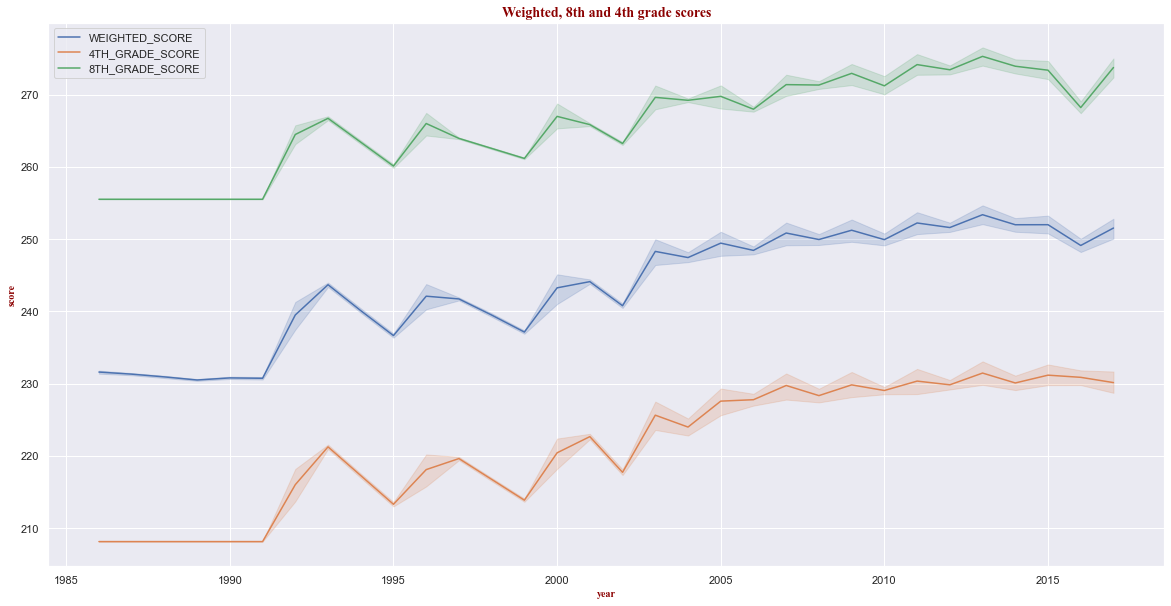

In [134]:

plt.figure(figsize = (20,10))
sns.set(style="darkgrid")
columns = ['WEIGHTED_SCORE','4TH_GRADE_SCORE','8TH_GRADE_SCORE']

for column in columns:
    sns.lineplot(x="YEAR", y=column, data=df, legend='brief', label = column)
    
plt.ylabel('score', fontdict=axis_font)
plt.xlabel('year', fontdict=axis_font)
plt.title('Weighted, 8th and 4th grade scores', fontdict=title_font)
plt.show()

### Q2

Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

---
- Oncelikle harcama degiskenleri ve agirlikli notlari ayri bir dataframe e aktaralim, harcama kalemleri 8 ila 12 inci sutunlarda bulunmakta.

In [135]:
# Get the expenditure columns in another df
df_edu = df.iloc[:,8:13]
# concat the expenditures and weighted score columns
df_edu = pd.concat([df_edu, df['WEIGHTED_SCORE']], axis=1)
df_edu

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,WEIGHTED_SCORE
0,1062563.0,744713.0,314580.0,78535.0,-110245.0,231.901451
1,722083.0,315876.0,325356.0,25800.0,-30001.0,229.774683
2,2077062.0,780075.0,699533.0,57495.0,459120.0,231.190716
3,950017.0,561034.0,235357.0,-986.0,97834.0,232.279011
4,16189998.0,8633931.0,6102791.0,947425.0,-246354.0,231.041568
...,...,...,...,...,...,...
1627,16881828.0,9133332.0,5253889.0,659539.0,1235924.0,259.509529
1628,16876454.0,7665766.0,5298478.0,608286.0,2807049.0,254.667646
1629,3266151.0,1788567.0,1092566.0,239138.0,130046.0,249.538027
1630,12021393.0,5797362.0,3691069.0,502624.0,1270875.0,251.789255


- Daha sonra yeni dataframe in korelasyon matrisini olusturabiliriz

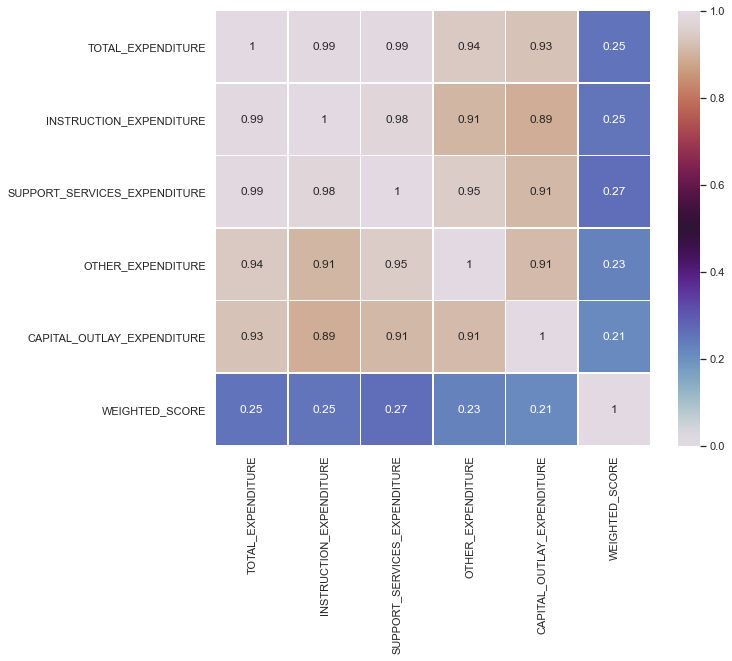

In [136]:
edu_corr = df_edu.corr()

plt.figure(figsize=(10,8))
sns.heatmap(edu_corr,  square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='twilight')
plt.show()

- Korelasyon matrisinde agirlikli notlar ile en yuksek korelasyonun SUPPORT_SERVICES_EXPENDITURE degiskeni ile oldugu gozlenmistir. (0.27)

### Q3

Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

---
***Temel Bilesenler Analizi (Principal Components Analysis - PCA)***
- Verilerin kovaryans matrisi olusturulur. (ozvektorleri hesaplamak icin gereklidir)
- Ozvektorler ve ozdegerler hesaplanarak bilesenlere ulasilir.
- Kac bilesen tutulacagina iki yontemle karar verilir:
    - Ozdegerleri 1 den buyuk olan bilesenler tutulur.
    - Scree grafigi eğiminin en şiddetli değiştiği noktaya dusen tum bilesenler tutulur.


---
Verilerimiz (4 harcama verisi df_edu nun 1-4 sutunlari) için kovaryans matrisini oluşturalım . 

Numpy kütüphanesindeki kovaryans matrisi verilerin satırlarla gösterilmesini gerektirir. Bu nedenle önce matrisimizin transpozunu
alıyoruz:

X dataframe i temsil eden bir matris olmak uzere;
X için kovaryans matrisini X ve X'in transpozunun ($X^T$) matris çarpımı olarak ifade edebiliriz. 



In [137]:
### covariance matrix
# dataframe den gerekli 4 sutun alinir (4 farkli harcama verisi)
df_edu_4_expenditure = df_edu.iloc[:,1:5].dropna()
# veriler X matrisine aktarilir
X = StandardScaler().fit_transform(df_edu_4_expenditure)
# X in transpozu alinir
Xt = X.T
# covariance matirisini hesaplanir
Cx = np.cov(Xt)
#print('Kovaryans matrisi :\n', Cx)

### eigenvectors and eigenvalues
# covariance matrisinden ozvektorler ve ozdegerler hesaplanir
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

- Bileşenler, özdeğerlerin karekökü ile bölünmüş özvektörlerdir.
- Bileşenleri hesaplamak için verimizin özvektörlerini ve kovaryans matrisini kullanabiliriz.
- PCA çalıştırılırken alınacak en büyük karar, kaç bileşenin saklanması gerektiğidir. PCA aslında korelasyon matrisindeki değişkenler kadar bileşeni bize geri verecektir. Saklanacak bileşenlerin sayısını seçme konusunda bize yol gösterecek birkaç kural vardır:
    - En açık olanı, özdeğerleri 1'den büyük olan bileşenleri değer katacağı için tutmaktır.
    - Diğer bir kural, özdeğerleri sırayla en yüksekten en düşüğe doğru bir çizgiyle bağlayarak görselleştirmektir. Buna “kayşat/scree(dağın dibinde biriken gevşek kaya)” grafiği denir. Görsel incelemenin ardından analist, özdeğerleri çizginin eğiminin en şiddetli değiştiği noktaya ("dirsek" olarak da adlandırılır) düşen tüm bileşenleri tutacaktır.



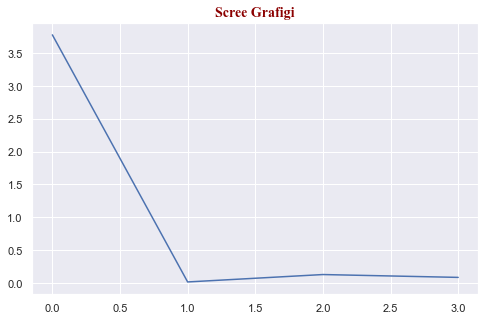

Ozdegerler Matrisi:
[3.77750754 0.01427949 0.12698865 0.0836768 ]


In [142]:
plt.figure(figsize=(8,5))
plt.title('Scree Grafigi', fontdict=title_font)
plt.plot(eig_val_cov)
plt.show()
print('Ozdegerler Matrisi:')
print(eig_val_cov)

- Kayşat grafiği ve özdeğerler > 1 kuralı, yalnızca ilk bileşeni tutmamız gerektiği konusunda hemfikirdir. 
- Yeni bileşenimizin eski değişkenlerimizle ne kadar iyi korelasyon gösterdiğine bakalim.
    - Oncelikle temel bilesen olusturulmali bunu scikit-learn'deki PCA fonksiyonunu kullanarak yapabiliriz.

In [154]:
# Elle hesaplama yontemi
# ozvektorlerin ilki alinir, ilk bilesen secildiginden
P = eig_vec_cov[:, 0]
# P vektorunun transpozu X in transpozu ile matris carpimina tabi tutulur
# cikan sonuc bizim yeni bilesenimizin verileridir, 
# 1632 adet noktadan (satir olarak dusunulebilir) olusur
Y = P.T.dot(Xt)

# sklearn yontemi
# kac bilesen seciyorsak PCA metoduna parametre olarak giriyoruz
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)
print('Veri kümesindeki toplam varyans yüzdesi:\n',sklearn_pca.explained_variance_ratio_)

Veri kümesindeki toplam varyans yüzdesi:
 [0.94379822]


***Sonuc***

- Temel Bileşenler Analizi (PCA) uygulandiktan sonra toplam varyansın %94'u ilk bileşen tarafından açıklanabilmektedir.

### Q4

Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?


---
- Oncelikle temel bilesenimizi dataframe e ekleriz
- Daha sonra yeniden korelasyon grafigini inceleriz

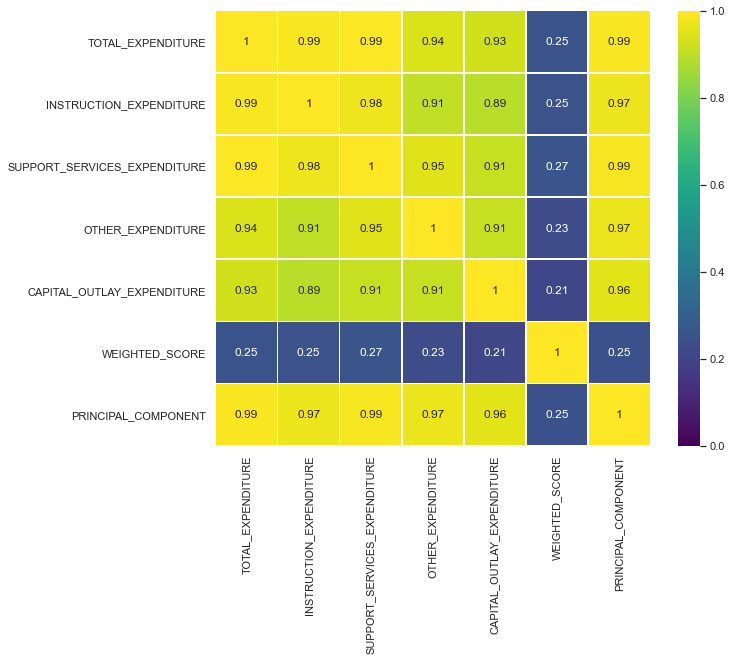

In [155]:
# add new column to the dataframe
df_edu['PRINCIPAL_COMPONENT'] = Y_sklearn
# calculate the correlation
edu_corr = df_edu.corr()

# plot the correlation map
plt.figure(figsize=(10,8))
sns.heatmap(edu_corr,  square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.show()

***Sonuc***

- Temel bilesenimizin agirlikli notlar ile korelasyonu 0.25 olarak cikmistir.
- 4 harcama kaleminde en yuksek korelasyon 0.27 oldugundan cikan sonuc normaldir.

### Q5

Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?


---
- Harcama kalemlerinin yerine ilk temel degiskeni secmek uygun olacaktir, cunku 4 boyutlu bir veriden tek boyutlu veriye gecis neticesinde modelimizin hesaplama suresi dusecektir.